## Observations and Insights 

1. The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.84) resulting from the linear regression.
2. The results of the study are very consistent and reliable since there is only 1 outlier in the data set for the top drugs.
3. Effectiveness of Capomulin and Ramicane is significantly more than Infubinol and Ceftamine (based on the box plots of the final tumor volumes by drugs). So from the selected treatments Capomulin and Ramicane reduces the size of tumors better.
4. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230). By removing duplicates the total number of mice is 248. The total count of mice by gender is 124 female mice and 125 male mice

## Instructions - Your tasks are to do the following:
1. Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.Use the cleaned data for the remaining steps.

2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumour volume for each drug regimen.

3. Generate a bar plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows  the number of total mice for each treatment regimen throughout the course of the study.
  * **NOTE:** These plots should look identical.

4. Generate a pie plot using both Pandas's `DataFrame.plot()` and Matplotlib's `pyplot` that shows the distribution of female or male mice in the study.
  * **NOTE:** These plots should look identical.

5. Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

6. Using Matplotlib, generate a box and whisker plot of the final tumour volume for all four treatment regimens and highlight any potential outliers in the plot by changing their colour and style.

  **Hint**: All four box plots should be within the same figure. Use this [Matplotlib documentation page](https://matplotlib.org/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py) for help with changing the style of the outliers.

7. Select a mouse that was treated with Capomulin and generate a line plot of tumour volume vs. time point for that mouse.

8. Generate a scatter plot of mouse weight versus average tumour volume for the Capomulin treatment regimen.

9. Calculate the correlation coefficient and linear regression model between mouse weight and average tumour volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

10. Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.


In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [22]:
# Checking the number of mice.
mice = data_df["Mouse ID"].value_counts()
number_of_mice = len(mice) 
number_of_mice

249

In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df.loc[data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [24]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = pd.DataFrame(duplicate_mice)
duplicate_mouse_id

,0
0,g989


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicate_mice)==False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].value_counts()
clean_number_of_mice = len(clean_mice)
clean_number_of_mice

248

## Summary Statistics

In [27]:
#2. Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumour volume for each drug regimen. 
# This method is the most straighforward, creating multiple series and putting them all together at the end.

summary_df = clean_df.groupby('Drug Regimen')
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_variance = summary_df['Tumor Volume (mm3)'].var()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_df1 = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,'Variance':tumor_variance,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})
summary_df1.to_csv("data/Summary_Statistics_TumorVolume_Drug", index=True, header=True)
summary_df1 

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [28]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary_df2 = summary_df.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_df2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

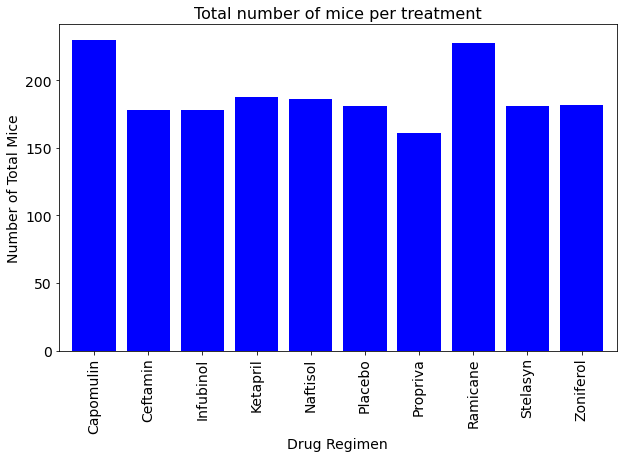

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [29]:
#3. Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the 
#   number of total mice for each treatment regimen throughout the course of the study.
#   NOTE: These plots should look identical.

# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas.
total_mice_per_reg = data_df.groupby(["Drug Regimen"]).count()["Mouse ID"]


bar_plot = total_mice_per_reg.plot.bar(width=0.8, figsize=(10,6), color='b',fontsize = 14)
bar_plot.set_xlabel("Drug Regimen", fontsize = 14)
bar_plot.set_ylabel("Number of Total Mice", fontsize = 14)
bar_plot.set_title("Total number of mice per treatment", fontsize = 16)
plt.savefig("data/Total number of mice per treatment_pandas.png")

plt.show()
total_mice_per_reg

In [30]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
#  Create an array that contains the number of mice each drug regimen has

total_mice =(data_df.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
total_mice

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

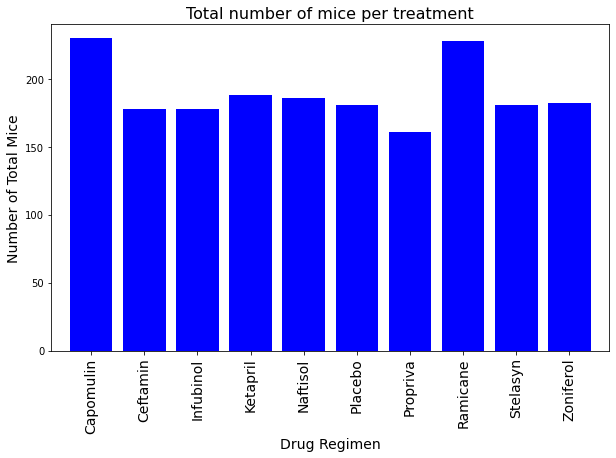

In [31]:
x_axis = np.arange(len(total_mice_per_reg))
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.bar(x_axis, total_mice, color='b',  align='center' )

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_mice_per_reg.index.values, rotation=90, fontsize = 14)


plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(total_mice)+10)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Total Mice",fontsize = 14)
plt.title("Total number of mice per treatment", fontsize = 16)
plt.savefig("data/Total number of mice per treatment_Pyplot.png")
plt.show()

In [32]:
#4. Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that 
    #shows the distribution of female or male mice in the study.NOTE: These plots should look identical.
 
# Group by gender and get the number to plot
groupby_gender = data_df.groupby(["Mouse ID","Sex"])
groupby_gender
gender_df = pd.DataFrame(groupby_gender.size())

# Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

# create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

# gender_df
mouse_gender

,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


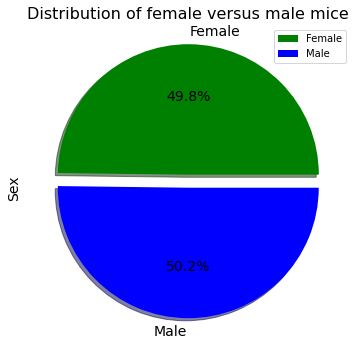

In [33]:
#  Generate a pie plot showing the distribution of female versus male mice using Pandas's DataFrame.plot()
colors = ['green', 'blue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(10,6), colors = colors, startangle=0, 
                             explode = explode, shadow = True, autopct="%1.1f%%", fontsize = 14)
plt.ylabel('Sex',fontsize = 14)
plt.title('Distribution of female versus male mice',fontsize = 16)
plt.savefig("data/Distribution of female versus male mice_pandas.png", bbox_inches = "tight")
plt.show()

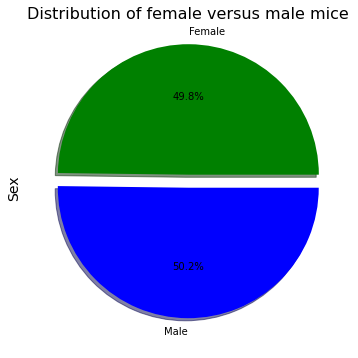

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Female","Male"]
#sizes = [49.799197,50.200803]

sizes = mouse_gender["Percentage of Sex"]
colors = ['green', 'blue']
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.pie(sizes, explode=explode,labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0,)
plt.title('Distribution of female versus male mice',fontsize = 16)
plt.ylabel('Sex',fontsize = 14)

plt.savefig("data/Distribution of female versus male mice_pyplot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [35]:
#5. Calculate the final tumour volume of each mouse across four of the most promising treatment regimens: 
    #Capomulin, Ramicane, Infubinol, and Ceftamin. 
    #Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.
    

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_tp_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [36]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
drug_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"Drug Regimen: {drug}")
    print(f"Lower quartile for {drug}: {lowerq}")
    print(f"Upper quartile for {drug}: {upperq}")
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')
    print ('')
    

    

Drug Regimen: Capomulin
Lower quartile for Capomulin: 32.37735684
Upper quartile for Capomulin: 40.1592203
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0

Drug Regimen: Ramicane
Lower quartile for Ramicane: 31.56046955
Upper quartile for Ramicane: 40.65900627
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0

Drug Regimen: Infubinol
Lower quartile for Infubinol: 54.04860769
Upper quartile for Infubinol: 65.52574285
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1

Drug Regimen: Ceftamin
Lower quartile for Ceftamin: 48.72207785
Upper quartile for Ceftamin: 64.29983003
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 8

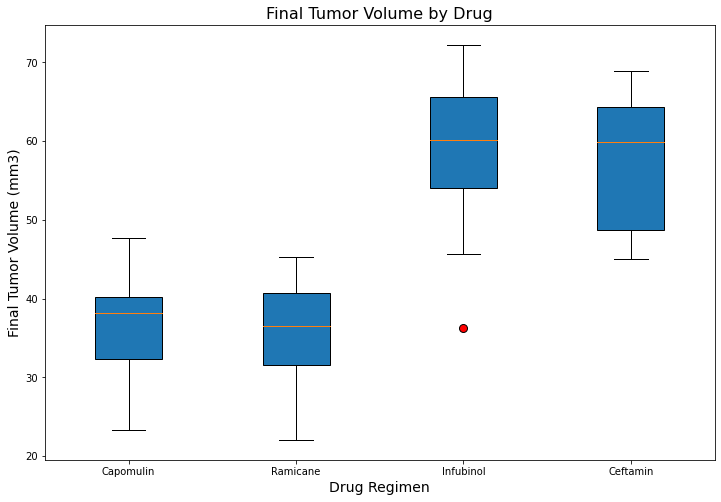

In [37]:
#6. Using Matplotlib, generate a box and whisker plot of the final tumour volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their colour and style.
# Hint: All four box plots should be within the same figure. 

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots(figsize=(12,8))

flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(drug_values, flierprops=flierprops, labels=drugs, widths = 0.4, patch_artist=True,vert=True)
plt.title('Final Tumor Volume by Drug', fontsize = 16)
plt.ylabel('Final Tumor Volume (mm3)',fontsize = 14)
plt.xlabel('Drug Regimen', fontsize = 14)
#plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.savefig('data/Final Tumor Volume by Drug.png', bbox_inches = "tight")
plt.show()

## Line and Scatter Plots

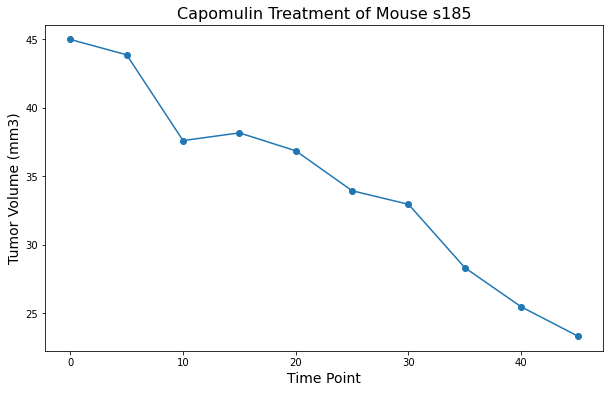

In [38]:
#7. Select a mouse that was treated with Capomulin and 
# generate a line plot of tumour volume vs. time point for that mouse.


# Identify data points of a mouse treated with Capomulin
mouse = data_df.loc[data_df['Mouse ID'] == 's185']
 
# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis and Add labels and title to plot
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Time Point", fontsize =14)
plt.ylabel("Tumor Volume (mm3)",fontsize =14)
plt.title("Capomulin Treatment of Mouse s185",fontsize =16)
plt.savefig('data/Capomulin Treatment of Mouse s185".png')
plt.show()

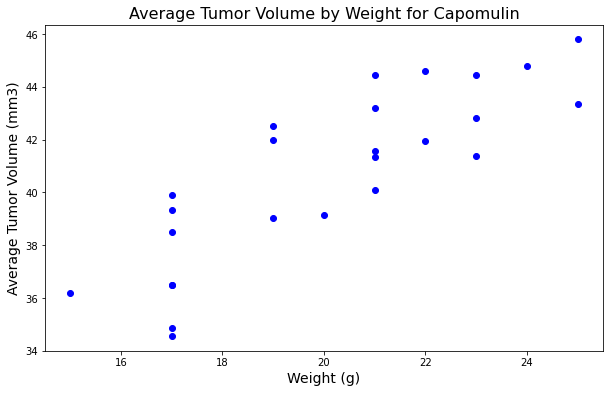

In [39]:
#8. Generate a scatter plot of mouse weight versus average tumour volume for the Capomulin treatment regimen.

# Store data for the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x, y, color="blue")
plt.xlabel("Weight (g)", fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)", fontsize =14)
plt.title("Average Tumor Volume by Weight for Capomulin",fontsize =16)
plt.savefig("data/Average Tumor Volume by Weight for Capomulin.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.
slope:0.9544396890241047
intercept:21.55216053268501
rvalue (Correlation coefficient):0.841936342469472
stderr:0.1275435903320133
r-squared: 0.7088568047708721
y = 0.95x + 21.55


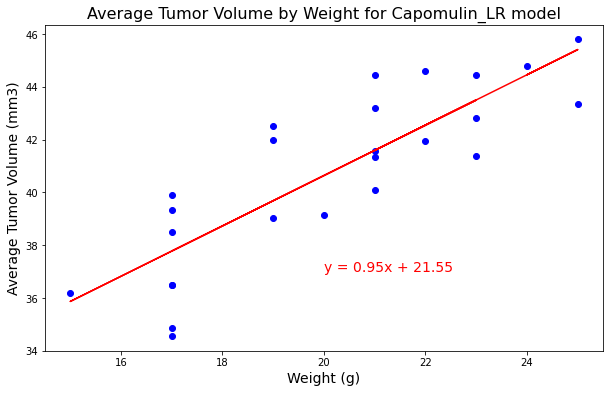

In [40]:
#9. Calculate the correlation coefficient and linear regression model 
# between mouse weight and average tumour volume for the Capomulin treatment. 


# Plot the linear regression model on top of the previous scatter plot (so can comment out below code to calculate avg tumor volume

#capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
#avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
#avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
#final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
#final_avg_vol_df
#x = final_avg_vol_df['Weight (g)']
#y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"stderr:{stderr}")
print(f"r-squared: {rvalue**2}")
print(line_eq)

# Plot linear regression on top of scatter plot, Annotate linear regression, Add labels and title to plot
fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.scatter(x,y, color="blue")
plt.plot(x,regress_values,"r-") 
plt.annotate(line_eq,(20,37),fontsize=14,color="red")
plt.xlabel("Weight (g)",fontsize =14)
plt.ylabel("Average Tumor Volume (mm3)",fontsize =14)
plt.title("Average Tumor Volume by Weight for Capomulin_LR model",fontsize =16)
plt.savefig("data/Average Tumor Volume by Weight for Capomulin_LRmodel.png", bbox_inches = "tight")
plt.show()

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

1. The heavier the mouse, the less effective the drug is (see scatter plot). This is a reliable conclusion because of the strong r-value correlation (0.84) resulting from the linear regression.
2. The results of the study are very consistent and reliable since there is only 1 outlier in the data set for the top drugs.
3. Effectiveness of Capomulin and Ramicane is significantly more than Infubinol and Ceftamine (based on the box plots of the final tumor volumes by drugs). So from the selected treatments Capomulin and Ramicane reduces the size of tumors better.
4. The bar graph showed the Drug Regimen Capomulin has the maximum mice number (230). By removing duplicates the total number of mice is 248. The total count of mice by gender is 124 female mice and 125 male mice